In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
city='Portland'
data = pd.read_csv('data/temperature.csv',
                      usecols=['datetime', city],
                      parse_dates=['datetime'],
                      index_col=['datetime'],
                      infer_datetime_format=True,
                      skiprows=[1])

In [3]:
data.head()

,Portland
datetime,
2012-10-01 13:00:00,282.080000
2012-10-01 14:00:00,282.083252
2012-10-01 15:00:00,282.091866
2012-10-01 16:00:00,282.100481
2012-10-01 17:00:00,282.109095


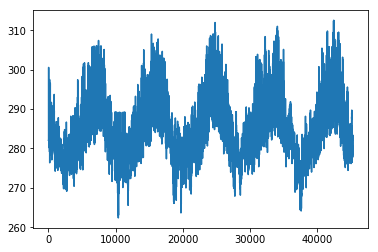

In [4]:
#plotar a serie
plt.plot([i for i in range(data.shape[0])], data[city])

In [5]:
magnitude = data[city]

# samplingFrequency = len(amplitude)
samplingFrequency = len(magnitude)

In [6]:
fourierTransform = np.fft.fft(magnitude)

# Frequency domain representation
fourierTransform = np.fft.fft(magnitude)/len(magnitude)           # Normalize amplitude
fourierTransform = fourierTransform[range(int(len(magnitude)/2))] # Exclude sampling frequency

tpCount     = len(magnitude)
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/samplingFrequency
frequencies = values/timePeriod

In [7]:
frequencies = frequencies[1:]
fourierTransform = fourierTransform[1:]

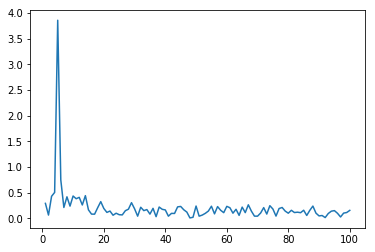

In [11]:
# plt.plot(frequencies, abs(fourierTransform))
plt.plot(frequencies[:100], abs(fourierTransform)[:100])


In [20]:
test = list(zip(frequencies, fourierTransform))

In [22]:
test[:10]

[(1.0, (-0.17962156547752536+0.23233273118926911j)),
 (2.0, (0.06601644840824794-0.006733649509023874j)),
 (3.0, (0.20625136006658865+0.37881945876601714j)),
 (4.0, (-0.12533987821464074+0.49117002590685727j)),
 (5.0, (-0.8458648035527341+3.764688901100609j)),
 (6.0, (0.13159975604632929-0.7399577494716308j)),
 (7.0, (-0.04407012574485535-0.20949702132086728j)),
 (8.0, (-0.0670058177577855-0.4161327060690446j)),
 (9.0, (0.1495653904834511-0.18816139895770734j)),
 (10.0, (-0.3838865819305447+0.209071733955313j))]

In [27]:
test[0][1] < test[5][1]

True

In [28]:
sorted_by_second = sorted(test, key=lambda tup: tup[1])

In [29]:
sorted_by_second[:10]

[(5.0, (-0.8458648035527341+3.764688901100609j)),
 (1886.0, (-0.4410002118711071+1.0752020681143517j)),
 (1880.0, (-0.401629173727187-0.1070746655460675j)),
 (10.0, (-0.3838865819305447+0.209071733955313j)),
 (1891.0, (-0.33622783249815846-0.2103445647999346j)),
 (88.0, (-0.23958182617071083+0.029864415710588385j)),
 (57.0, (-0.21578697840258843-0.08310784669244894j)),
 (78.0, (-0.20497610894470328-0.0599727194364984j)),
 (75.0, (-0.1832974664015593+0.004045394102329828j)),
 (1.0, (-0.17962156547752536+0.23233273118926911j))]